In [43]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [44]:
images_path = 'archive/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [45]:
images[:5]

['archive/Flickr_Data/Images/2387197355_237f6f41ee.jpg',
 'archive/Flickr_Data/Images/2609847254_0ec40c1cce.jpg',
 'archive/Flickr_Data/Images/2046222127_a6f300e202.jpg',
 'archive/Flickr_Data/Images/2853743795_e90ebc669d.jpg',
 'archive/Flickr_Data/Images/2696951725_e0ae54f6da.jpg']

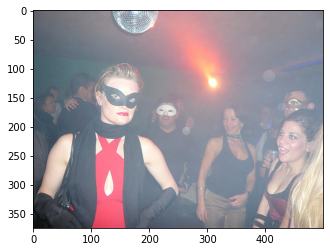

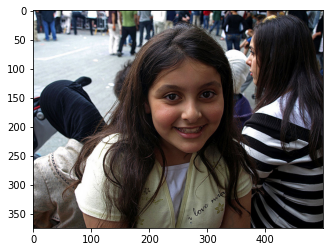

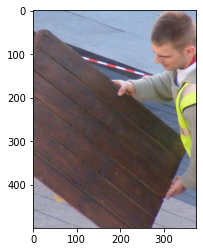

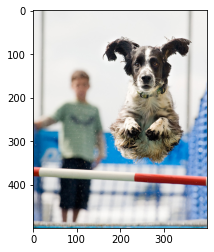

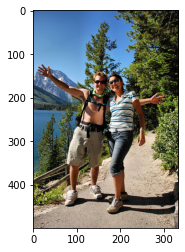

In [46]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [47]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [48]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [49]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 2999:
        break
        
    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 166ms/step
50
1/1 [==============================] - 0s 107ms/step
100
1/1 [==============================] - 0s 123ms/step
150
1/1 [==============================] - 0s 118ms/step
200
1/1 [==============================] - 0s 126ms/step
250
1/1 [==============================] - 0s 137ms/step
300
1/1 [==============================] - 0s 122ms/step
350
1/1 [==============================] - 0s 129ms/step
400
1/1 [==============================] - 0s 113ms/step
450
1/1 [==============================] - 0s 105ms/step
500
1/1 [==============================] - 0s 110ms/step
550
1/1 [==============================] - 0s 111ms/step
600
1/1 [==============================] - 0s 158ms/step
650
1/1 [==============================] - 0s 109ms/step
700
1/1 [==============================] - 0s 108ms/step
750
1/1 [==============================] - 0s 103ms/step
800
1/1 [==============================] - 0s 105ms/step
850
1/1 [===========================

In [50]:
len(images_features)

3000

Text preprocess

In [51]:
caption_path = 'archive/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')
len(captions)

40461

In [52]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [53]:
len(captions_dict)

3000

Visualize Images with captions

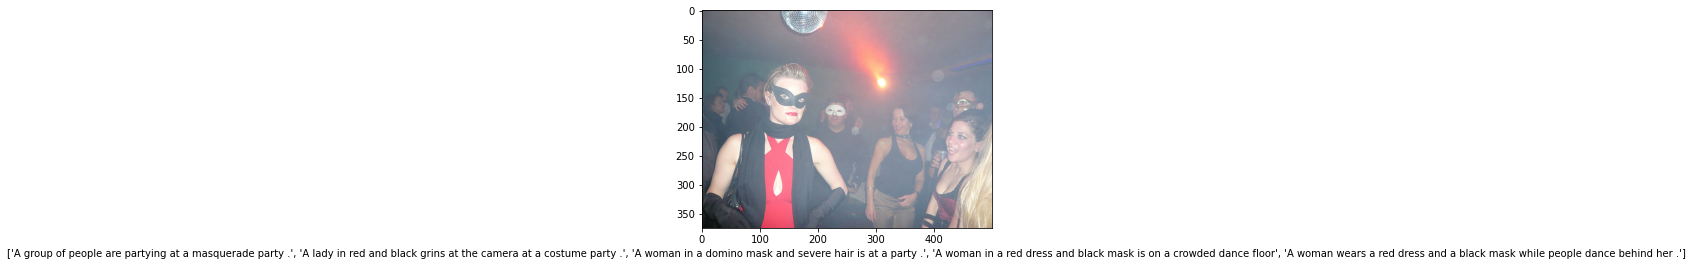

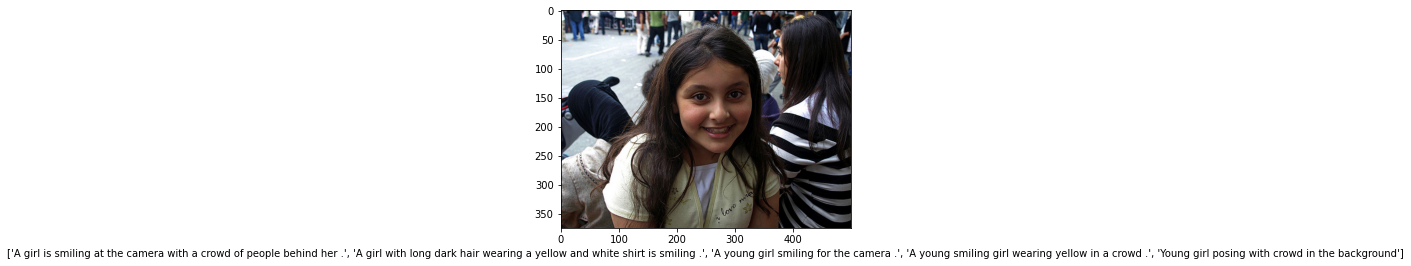

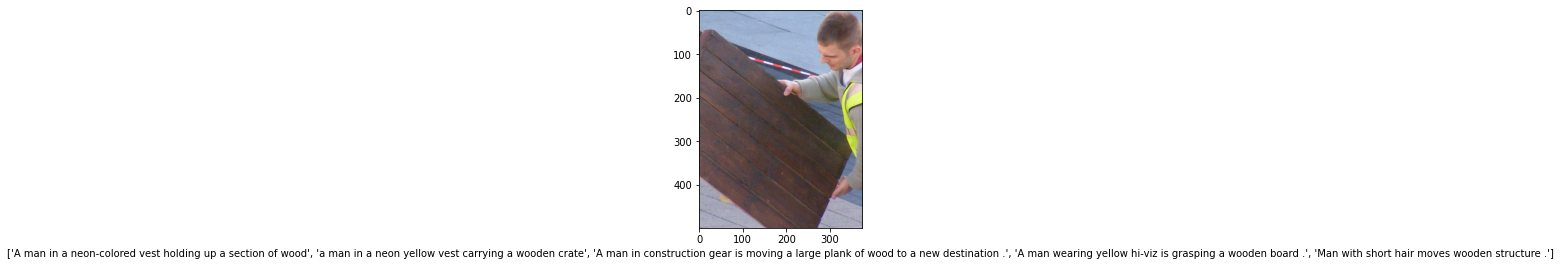

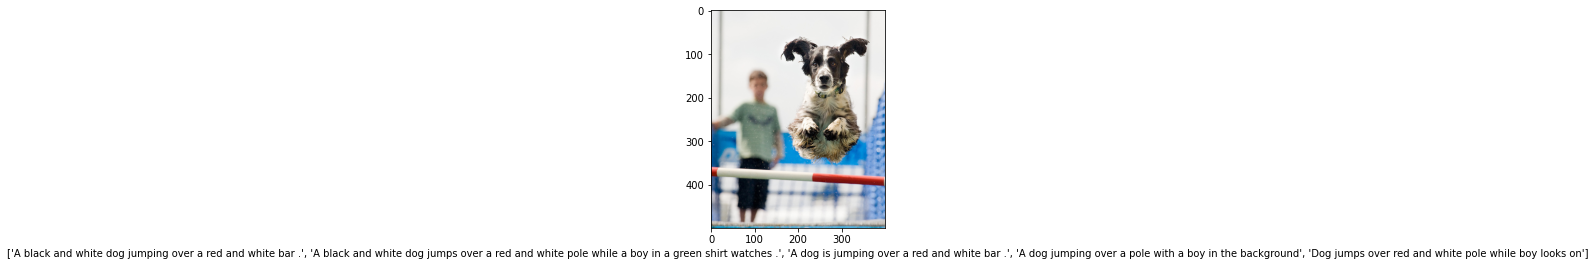

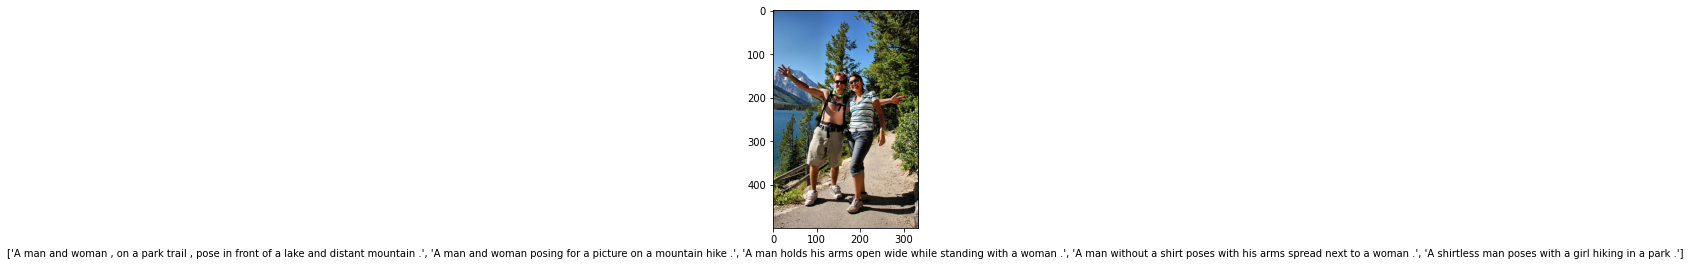

In [54]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

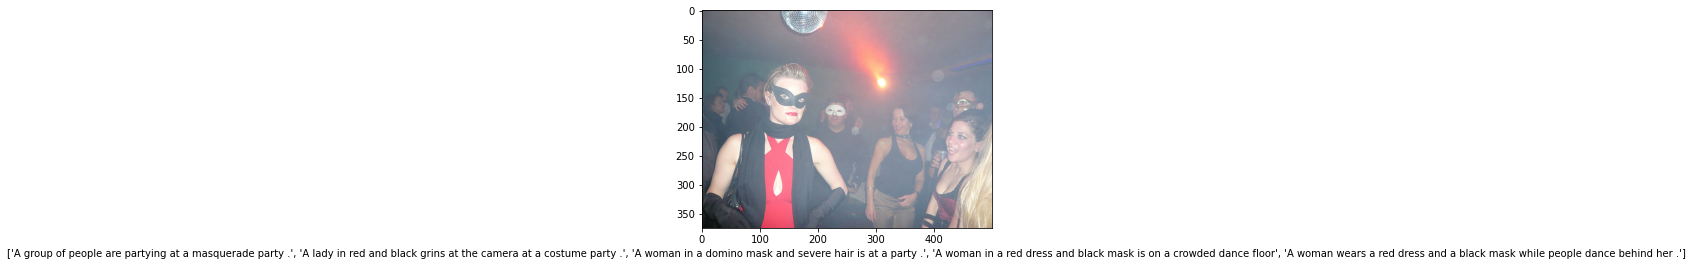

In [55]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'archive/Flickr_Data/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [56]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [57]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

Create Vocabulary

In [58]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [59]:
len(count_words)

5622

In [60]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [61]:
len(new_dict)

5622

In [62]:
new_dict['<OUT>'] = len(new_dict) 
captions_backup = captions_dict.copy()
captions_dict = captions_backup.copy()

In [63]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [64]:
list(captions_dict.values())[0]

[[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18],
 [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
 [1,
  2,
  22,
  4,
  6,
  23,
  24,
  25,
  13,
  26,
  6,
  9,
  10,
  2,
  27,
  28,
  13,
  2,
  12,
  29,
  30,
  17,
  18],
 [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
 [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]]

Build Generator Function

In [65]:
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [66]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 130, 37, 131, 132, 127, 133, 134, 43, 23, 135, 127, 20, 136, 96, 2, 137, 13, 2, 51, 43, 138, 17, 18]
[1, 2, 69, 19, 78, 23, 124, 10, 2, 109, 100, 96, 123, 171, 6, 9, 10, 252, 253, 68, 76, 69, 243, 29, 17, 18]
[1, 23, 4, 6, 23, 393, 370, 394, 19, 209, 136, 96, 126, 34, 64, 395, 59, 19, 248, 2, 36, 396, 37, 23, 309, 19, 397, 398, 17, 18]
[1, 2, 109, 6, 131, 668, 1272, 37, 487, 19, 1273, 29, 2, 66, 67, 68, 2, 372, 109, 6, 2, 82, 165, 77, 136, 96, 14, 29, 23, 67, 1110, 14, 1274, 1275, 18]
[1, 68, 59, 27, 38, 19, 35, 23, 358, 127, 76, 27, 38, 13, 2, 36, 1518, 29, 178, 523, 19, 94, 211, 2, 630, 118, 358, 68, 354, 869, 43, 2, 41, 91, 17, 18]


In [67]:
MAX_LEN

36

In [68]:
list(captions_dict.keys())[0]

'1002674143_1b742ab4b8.jpg'

In [69]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [70]:
X, y_in, y_out = generator(images_features, captions_dict)

In [71]:
len(X), len(y_in), len(y_out)

(192922, 192922, 192922)

In [72]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [73]:
X.shape, y_in.shape, y_out.shape

((192922, 2048), (192922, 36), (192922, 5623))

MODEL

In [74]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [75]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 36, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 36, 128)           719744    
                                                                 
 lstm_3 (LSTM)               (None, 36, 256)           394240    
                          

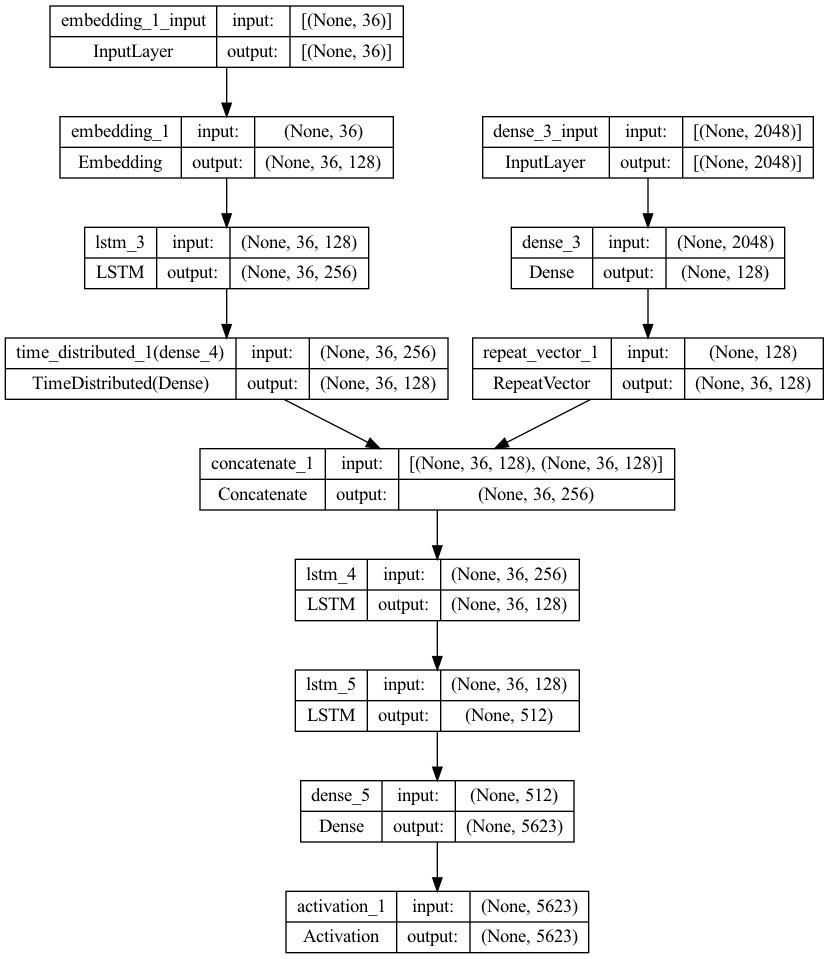

In [76]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [77]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
377/377 [==============================] - 723s 2s/step - loss: 5.1679 - accuracy: 0.1223
Epoch 2/50
377/377 [==============================] - 682s 2s/step - loss: 4.6681 - accuracy: 0.1715
Epoch 3/50
377/377 [==============================] - 733s 2s/step - loss: 4.2498 - accuracy: 0.2589
Epoch 4/50
377/377 [==============================] - 738s 2s/step - loss: 4.0723 - accuracy: 0.2781
Epoch 5/50
377/377 [==============================] - 645s 2s/step - loss: 3.8566 - accuracy: 0.3045
Epoch 6/50
377/377 [==============================] - 668s 2s/step - loss: 3.5608 - accuracy: 0.3403
Epoch 7/50
377/377 [==============================] - 669s 2s/step - loss: 3.3698 - accuracy: 0.3614
Epoch 8/50
377/377 [==============================] - 695s 2s/step - loss: 3.2293 - accuracy: 0.3796
Epoch 9/50
377/377 [==============================] - 713s 2s/step - loss: 3.1021 - accuracy: 0.3951
Epoch 10/50
377/377 [==============================] - 745s 2s/step - loss: 3.0030 - accura

In [78]:
inv_dict = {v:k for k, v in new_dict.items()}

In [79]:
model.save('model.h5')

In [80]:
model.save_weights('mine_model_weights.h5')

In [81]:
np.save('vocab.npy', new_dict)

In [82]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

Predictions

1/1 [==============================] - 0s 32ms/step


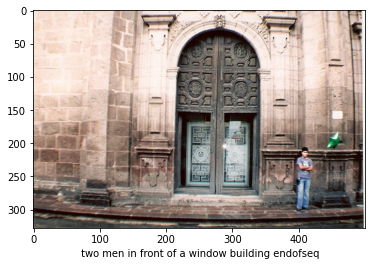

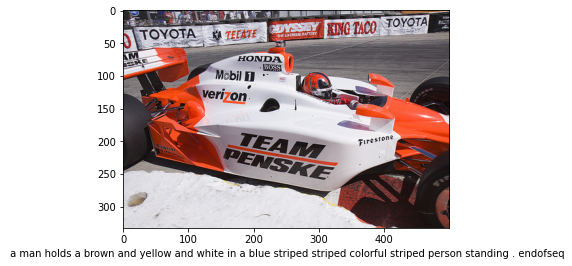

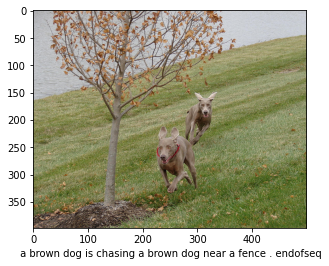

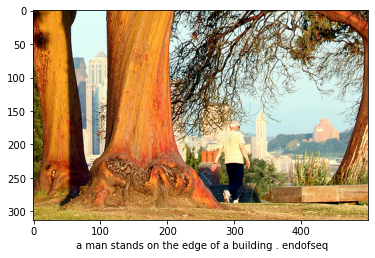

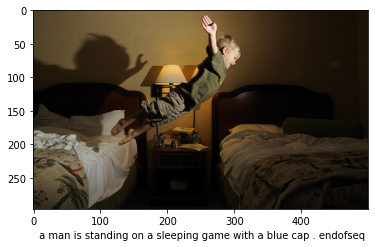

In [83]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)